# 1

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

data_election = pd.read_csv("date_alegeri_turul2.csv")

In [51]:
age_0 = data_election['Varsta']

sex_0 = data_election['Sex']

education_0 = data_election['Educatie']

income_0 = data_election['Venit']

vote_0 = data_election['Vot']

X_election = data_election[['Varsta', 'Sex', 'Educatie', 'Venit']].values
Y_election = data_election['Vot']

In [52]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=2)
    beta_2 = pm.Normal('beta_2', mu=0, sigma=2)
    beta_3 = pm.Normal('beta_3', mu=0, sigma=2)
    beta_4 = pm.Normal('beta_4', mu=0, sigma=2)

    mu = alpha + pm.math.dot(age_0, beta_1) + pm.math.dot(sex_0, beta_2) + pm.math.dot(education_0, beta_3) + pm.math.dot(income_0, beta_4)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    y = pm.Bernoulli('y', p=theta, observed=Y_election)
    idata_election = pm.sample(1000, tune=2000, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_1, beta_2, beta_3, beta_4]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 43 seconds.


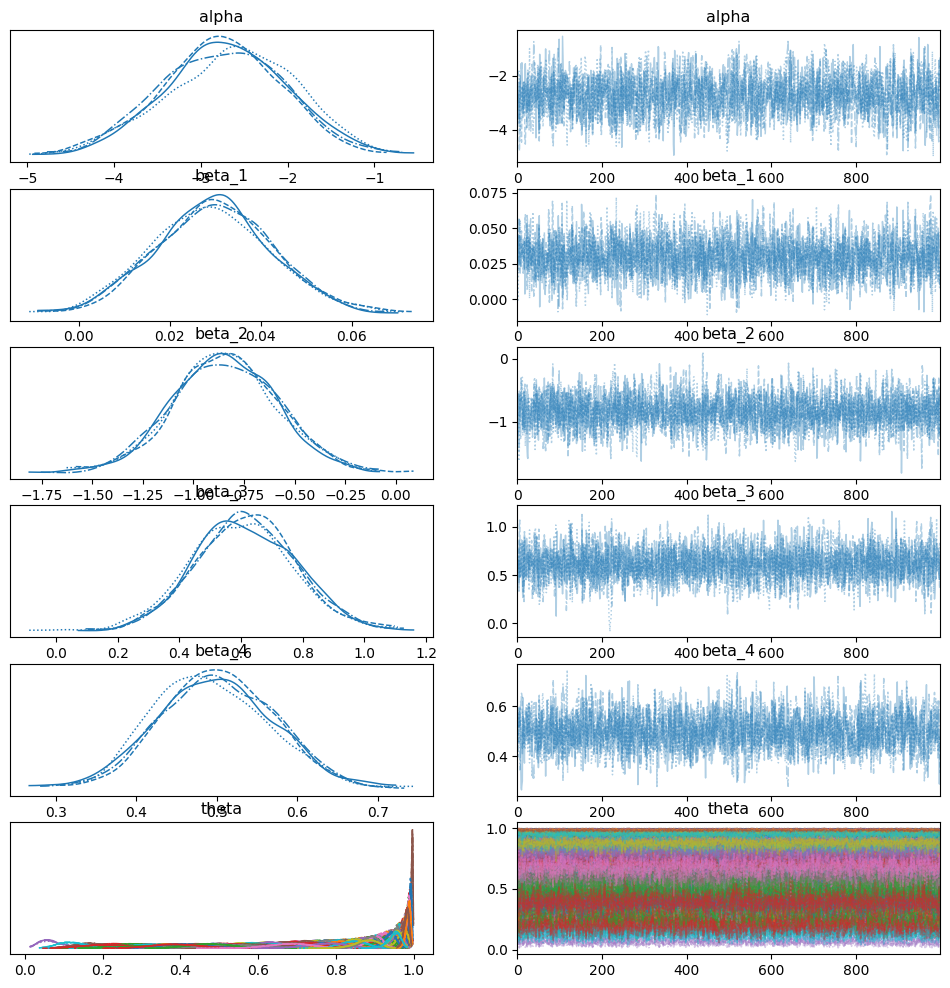

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha      -2.719  0.718  -4.059   -1.373      0.016    0.011    1980.0   
beta_1      0.030  0.013   0.004    0.054      0.000    0.000    2522.0   
beta_2     -0.843  0.256  -1.318   -0.357      0.005    0.003    2820.0   
beta_3      0.611  0.165   0.305    0.926      0.003    0.002    2721.0   
beta_4      0.499  0.072   0.368    0.632      0.001    0.001    2439.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[495]  0.980  0.007   0.967    0.992      0.000    0.000    2257.0   
theta[496]  0.679  0.054   0.577    0.777      0.001    0.001    2125.0   
theta[497]  0.886  0.021   0.847    0.925      0.000    0.000    2535.0   
theta[498]  0.878  0.031   0.819    0.929      0.001    0.000    3348.0   
theta[499]  0.948  0.017   0.917    0.978      0.000    0.000    2474.0   

            ess_tail  r_hat  
alpha         2328.0    1.0  
beta_1        2690.0    1.0  
beta_2   

In [53]:
pm.plot_trace(idata_election)
plt.show()

summary = pm.summary(idata_election)
print(summary)

# Comparam media (mean) la fiecare variabila beta pentru a vedea care dintre ele are un efect mai mare asupra rezultatului

In [55]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_2 = pm.Normal('beta_2', mu=0, sigma=2)
    beta_3 = pm.Normal('beta_3', mu=0, sigma=2)

    mu = alpha + pm.math.dot(sex_0, beta_2) + pm.math.dot(education_0, beta_3)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    y = pm.Bernoulli('y', p=theta, observed=Y_election)
    idata_election_new = pm.sample(1000, tune=2000, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_2, beta_3]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 28 seconds.


In [59]:
hdi = az.hdi(idata_election_new, hdi_prob=0.94)

# 2

In [3]:
data_iris = pd.read_csv("iris.csv")
X_sl = data_iris['sepal_length']
X_sw = data_iris['sepal_width']
X_pl = data_iris['petal_length']
X_pw = data_iris['petal_width']
Y = data_iris['species']
characteristics = [X_sl, X_sw, X_pl, X_pw]

In [9]:
idatas = []
models = []

for ch in characteristics:
    with pm.Model() as model:
        w = pm.Dirichlet('w', a=np.ones(3))

        mu = pm.Normal('mu', mu=np.linspace(ch.min(), ch.max(), 3),
                       sigma=10, shape=3, 
                       transform=pm.distributions.transforms.ordered)
        sd = pm.HalfNormal('sd', sigma=10)
        y = pm.NormalMixture('y', w=w, mu=mu, sigma=sd, observed=ch)
            
        idata = pm.sample(1000, tune=2000, random_seed = 42, return_inferencedata=True)
        idatas.append(idata)
        models.append(model)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sd]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 51 seconds.
There were 106 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sd]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 50 seconds.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sd]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 32 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu, sd]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 33 seconds.


In [ ]:
[pm.compute_log_likelihood(idatas[i], model=models[i]) for i in range(4)]

comp_waic = az.compare(dict(zip([], idatas)),
method='BB-pseudo-BMA', ic="waic", scale="deviance")

comp_waic